## Fetching Data From Kaggle Datasets to Google Colab / Jupyter Notebook using Kaggle Api 

Step 1 : Get Kaggle API access token
>Sign-in to your Kaggle account > “My Account” at the top right corner
![](https://miro.medium.com/max/1400/1*ou-jdgjPZLhDhkLVIfz-0A.png)

>Scroll down to API section and click on “Create New API Token” as in
given figure below. This downloads kaggle.json file to be used later.
![](https://miro.medium.com/max/1400/1*ClCpuxsoe4X_WI77ehA9fA.png)



Step 2 : Upload **kaggle.json** into Working directory where your notebook is present From Your local Directory
>Upload the kaggle.json file into your Google drive inside a folder. This is the folder where we are going to store our dataset.

Step 3 : Install **Kaggle api** using pip 

In [27]:
!pip install kaggle

Step 4 : print your working directory

In [28]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
# This provides the config path to the kaggle.json file 

import os
# copy paste your working directory location from the above output  eg : '/home/xyz/DataAnalysis'
os.environ['KAGGLE_CONFIG_DIR'] ="C:\\Users\\alloy\\Downloads\\Data Analysis Project\\Data Analysis Project"

 Step 5 : Now Download the Dataset using the **kaggle** command 
> Data Source : [Preterm Births (author : NATE SUTTON )](https://www.kaggle.com/datasets/natesutton/njpretermbirths)

In [30]:
!kaggle datasets download --force natesutton/njpretermbirths


  0%|          | 0.00/670k [00:00<?, ?B/s]
100%|##########| 670k/670k [00:00<00:00, 12.3MB/s]


Step 6: extract the downloaded zip file using **unzip** command and We are read to use the dataset

In [31]:
!unzip njpretermbirths.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


## Load Data

In [33]:
# Read data through pandas 
df = pd.read_csv('births.csv')
# display first 5 rows of Dataframe
df.head()

,age_group,reported_race_ethnicity,previous_births,tobacco_use_during_pregnancy,adequate_prenatal_care,preterm_indicator
0,Under 15 yrs,"White, non-Hispanic",None,Yes,Inadequate,0
1,Under 15 yrs,"White, non-Hispanic",None,Yes,Inadequate,0
2,Under 15 yrs,"White, non-Hispanic",None,Yes,Inadequate,0
3,Under 15 yrs,"White, non-Hispanic",None,Yes,Inadequate,0
4,Under 15 yrs,"White, non-Hispanic",None,Yes,Inadequate,0


### Data Description : 


*   **age_group** :  prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

*   **reported_race_ethnicity** : the reported race and ethnicity of the mother

*   **previous_births** : parity of mother, grouped into nulliparous and 1+ births

*   **tobacco_use_during_pregnancy** : reported tobacco use during the pregnancy

*   **adequate_prenatal_care** : calculated access to prenatal care, Kotelchuck method


*   **preterm_indicator** : binary indicator if the pregnancy lasted less than 37 weeks













In [34]:
#  prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096936 entries, 0 to 3096935
Data columns (total 6 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   age_group                     object
 1   reported_race_ethnicity       object
 2   previous_births               object
 3   tobacco_use_during_pregnancy  object
 4   adequate_prenatal_care        object
 5   preterm_indicator             int64 
dtypes: int64(1), object(5)
memory usage: 141.8+ MB


Only **preterm_indicator** is of **integer**(int64) datatype rest all are of object datatype indicating **categorical** variables.

In [35]:
# prints the shape of the column 
df.shape

(3096936, 6)

There are about **3096936** Rows and **6** Columns in the dataset.

### Exploratory Data Analysis

Check for missing values in the dataset 


In [36]:
#checks if there are any null values and sum up all the null values by column names 
df.isna().sum()

age_group                       0
reported_race_ethnicity         0
previous_births                 0
tobacco_use_during_pregnancy    0
adequate_prenatal_care          0
preterm_indicator               0
dtype: int64

There are no Missing Values in the Datasets . If there were any missing values then we could dealt with it using various methods :     


*   Deleting all rows with at least one missing value

*   Deleting rows with missing values in a specific column

*   Replacing missing values in a specific column with a given string

*  If the column values are numeric , Replace the missing values with mean,median,mode of that particular column

*  Replace missing values manually 

### Distribution Of Preterm Births

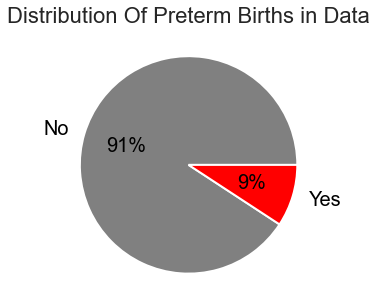

In [37]:
# define figure size
fig, ax = plt.subplots(figsize=(10,5))
# function for showing percentages in pie chart of classes respectively.
def label_function(val):
    return f'{val:.0f}%'

#plot pie chart of preterm births with all the properties
df.preterm_indicator.value_counts().plot(kind='pie',colors = ['grey','red'],labels = ['No','Yes'],autopct = label_function,textprops={'fontsize': 20,'color':'black'},labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' } )
#title 
plt.title('Distribution Of Preterm Births in Data', fontsize=22)
# y axis label
plt.ylabel('')
plt.show()




*   It is Clearly Visible that the Class Preterm Births in Highly Imbalanced .
* Higher proportion of the data belongs to the Women of no preterm birth records of around (91%).
* Women who went through preterm births are of 9% in the data.

* Since the class preterm birth has an uneven distribution , you may see irregularites in the visualization For eg: In the tobacco visualization which will you notice it later.



### Impact of Age Groups on Preterm Births

The age of a woman is one of the most important risk factors for premature birth. As women age, their risk of preterm birth increases. This risk is greater for older women than for younger women. An older mother is also more likely to have a preterm baby, which increases the risk of lifetime health problems related to prematurity, such as low birth weight, intellectual disability, and breathing problems.
Moreover, older maternal age is a risk factor for age-related diseases in later life. This risk increases as the mother ages.

In [38]:
#extract age group as index 
new_index = df['age_group'].value_counts().index

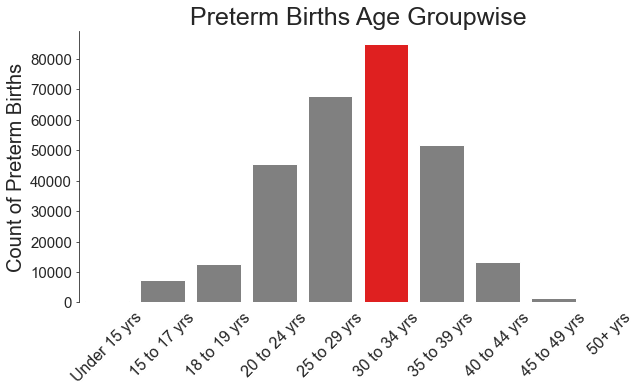

In [39]:
# define colors
colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'red', 'grey', 'grey', 'grey', 'grey']
# data containing of preterm births
df1 = df[df['preterm_indicator']==1]
fig, ax = plt.subplots(figsize=(10,5))
# set background style as white
sns.set_style('white')
# plot countplot where x axis is categorical variable and y axis consists of count ( occurnces in the data)
ax=sns.countplot(x='age_group',data=df1,palette=colors)
#title
plt.title('Preterm Births Age Groupwise', fontsize=25)
# x axis label
plt.xlabel(None)
# define x label fontsize and rotate the names by 45 degree
plt.xticks(fontsize=16,rotation=45)
# ylabel
plt.ylabel('Count of Preterm Births', fontsize=20)
# define y label fontsize 
plt.yticks(fontsize=15)
# eliminate the bottom line of x axis
sns.despine(bottom=True)
# removes grid
ax.grid(False)
# removes line from bottom
ax.tick_params(bottom=False, left=True)
# show figure
plt.show()




*   Preterm Births are seen higher in age group of 30 to 34 years of women 
*   As the age increases of women the risk of Preterm births also increases till mid 40s and decreases further. 
*  Preterm births due to age group shows a normal distribution where mean age of women in the data is between 25-35 years.



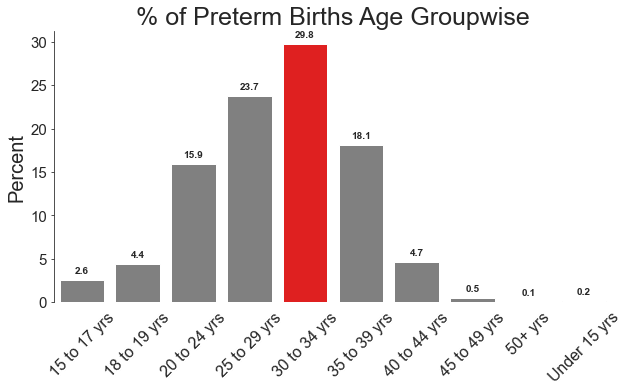

In [40]:
# get percentage of age_group value
percent = ((df1.age_group.value_counts() / len(df1)) * 100).to_frame()
# get their index
percent.index = percent.index.str.strip()
# sort the index
percent = percent.sort_index()
# reset the index to numbers
percent.reset_index(inplace=True)
# rename the columns
percent.columns = ['age_group','percentage']
# figsize define
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey', 'grey', 'grey', 'grey', 'red', 'grey', 'grey', 'grey', 'grey', 'grey']
# plot barchart
graph=sns.barplot(x=percent['age_group'],y=percent['percentage'],palette=colors)
plt.title('% of Preterm Births Age Groupwise', fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
# annotate the barchart with % values
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   weight='bold')
plt.show()



*   In New Jersey, preterm birth rates were highest for women ages 30-34 (29.8%), followed by women of 25-29 (23.7%), ages 35-39 (18.1%) and ages 20-24 (15.9%).



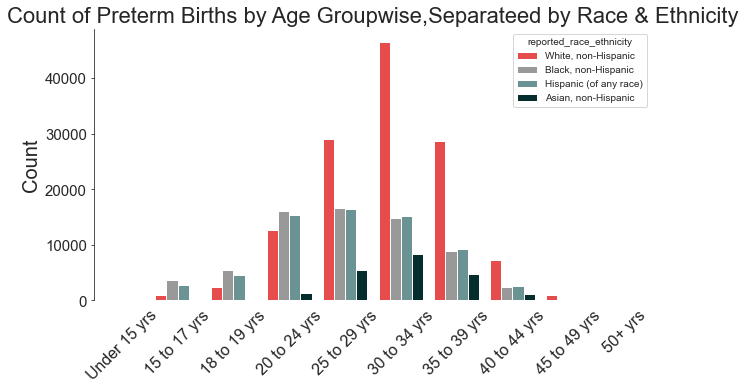

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
#define colors
colors4 = ['#FF3333','#999999', '#669999', '#003333']
# plot countplot of age group and hue is separation of the age group categroy
ax=sns.countplot(x='age_group',data=df1,hue='reported_race_ethnicity',palette = colors4)
plt.title('Count of Preterm Births by Age Groupwise,Separateed by Race & Ethnicity', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()



*   Age group  of women ranging between 25-45 years of age having white race and non-hispanic ethnicity have a higher risk of preterm births.
*  While women of Black race ranging from  15-24 ages have shown a higher risk of preterm births.
* In counter,Asian women shown lower risk of preterm births in all age groups.



In [42]:
# mapping values to previous births for better readability
df['previous_births']= df['previous_births'].map({'One, Two, Three or More':'Yes','None':'No'})

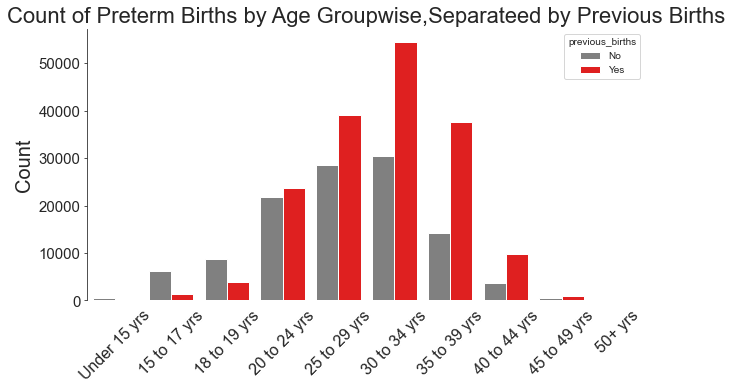

In [43]:

df2 = df[df['preterm_indicator']==1]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey','red']
ax=sns.countplot(x='age_group',data=df2,hue='previous_births',palette = colors)
plt.title('Count of Preterm Births by Age Groupwise,Separateed by Previous Births', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()


* Women who gave previous births ages from 20-44 years have higher risk of preterm births as compared to women of 15-20 years of age.
* The ratio  of previous briths of women of age group 35-39 years is very high as compared to rest of the age groups.

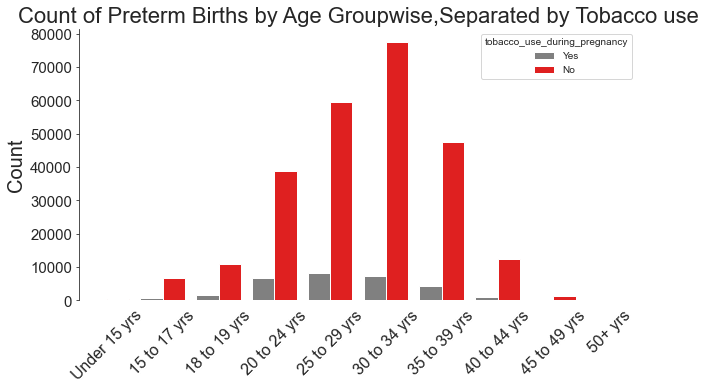

In [44]:
df2 = df[df['preterm_indicator']==1]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
ax=sns.countplot(x='age_group',data=df2,hue='tobacco_use_during_pregnancy',palette = ['grey','red'])
plt.title('Count of Preterm Births by Age Groupwise,Separated by Tobacco use', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()

* Because of the imbalanced distribution of Tobbacco use during pregnancy we couldn't visualize its real impact on preterm births.
*But Women of age group 18-39 years have shown a risk of preterm births who consume tobbacco during pregnancy.

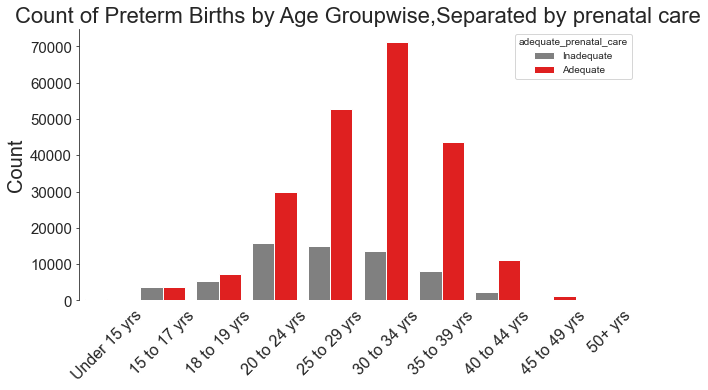

In [45]:

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
ax=sns.countplot(x='age_group',data=df2,hue='adequate_prenatal_care',palette = ['grey','red'])
plt.title('Count of Preterm Births by Age Groupwise,Separated by prenatal care', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=45)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()

* The ratio of adequate prenatal care of women ages 15-19 years is very much equal while the women of age ranging 20-50 years have very ratio towards adequate prenatal care
*From age ranging 18-50 years of women . There is a gradual decline in inadequate prenatal care.

### Analyzing reported_race_ethnicity feature

Race is a social construct that impacts all people differently and in different ways throughout their lives. It is a reality that we must acknowledge and understand, and not one that we should deny. There is no denying that there is a lot of race-related stigma surrounding the topic of preterm birth. This is not only an issue in the medical community but also in the general public. It is important to talk about this topic, especially with the rising number of preterm births in the United States. 
The United States has seen a rapid increase in preterm births in the past few decades, with one in five births now occurring before 37 weeks gestation. Rates of preterm birth vary with racial and ethnic groups. 

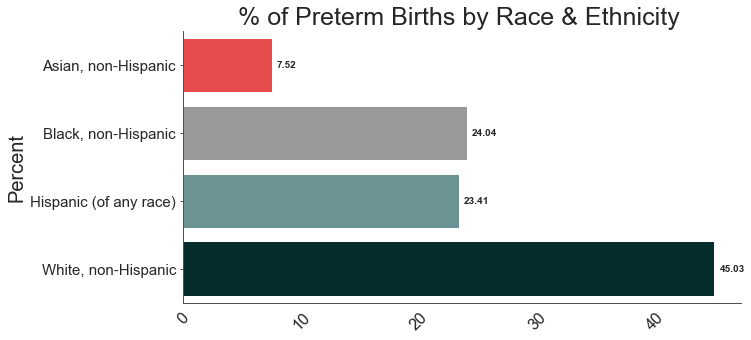

In [46]:
percent = ((df1.reported_race_ethnicity.value_counts() / len(df1)) * 100).to_frame()
percent.index = percent.index.str.strip()

percent = percent.sort_index()
percent.reset_index(inplace=True)
percent.columns = ['reported_race_ethnicity','percentage']
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
# colors = ['grey', 'grey', 'grey', 'grey', 'red', 'grey', 'grey', 'grey', 'grey', 'grey']
graph=sns.barplot(y=percent['reported_race_ethnicity'],x=percent['percentage'],palette=colors4)
plt.title('% of Preterm Births by Race & Ethnicity ', fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=45)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=False)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
total = len(df['reported_race_ethnicity'])
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center",
            weight='bold')
plt.show()


* A mother's race or ethnicity also determine her risk of having a preterm baby. White women have the highest risk of all racial and ethnic groups in the New Jersey with a 45.03 percent rate, based on data . Black women had a rate of 24.04 and Lowest risk in Asian Women 7.52 percent. 

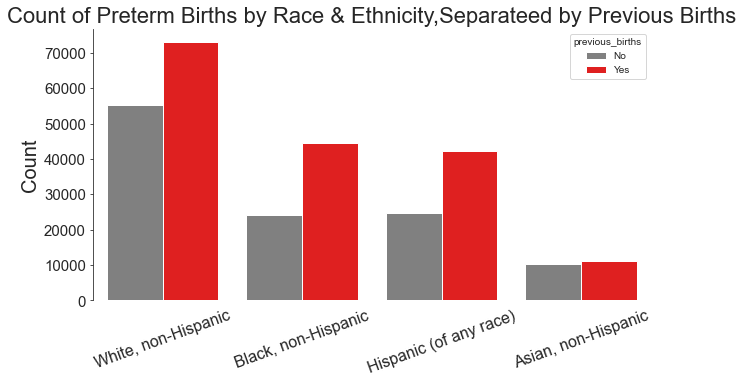

In [47]:
df2 = df[df['preterm_indicator']==1]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey','red']
ax=sns.countplot(x='reported_race_ethnicity',data=df2,hue='previous_births',palette = colors)
plt.title('Count of Preterm Births by Race & Ethnicity,Separateed by Previous Births', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=20)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()




*   Women of Black Race have a higher rate of preterm births with previous births.
*   Women of Asian Race have a lower rate of preterm births with  previous births.



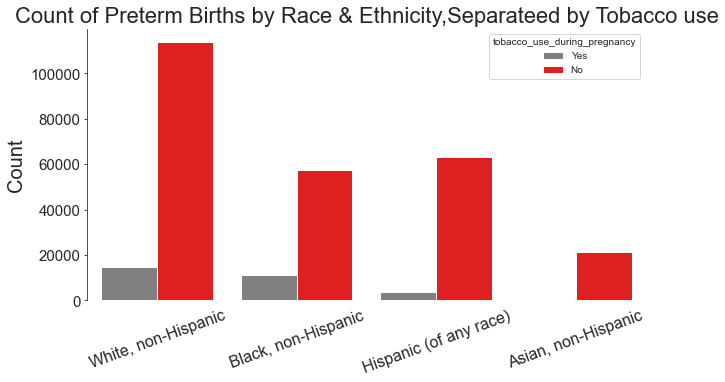

In [48]:
df2 = df[df['preterm_indicator']==1]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey','red']
ax=sns.countplot(x='reported_race_ethnicity',data=df2,hue='tobacco_use_during_pregnancy',palette = colors)
plt.title('Count of Preterm Births by Race & Ethnicity,Separateed by Tobacco use', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=20)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()


* Women of White and black race tend to have a higher risk to preterm births consuming tobacco during their pregnancy .
* The proportion of White Women of tobacco use is much higher than other Races & Ethnicity.
* No Preterm Births are seen in Asian women due to tobacco consumption during pregrenancy. The another case would be that  they didnt consumed Tobacco at all during pregnancy which is surprising.

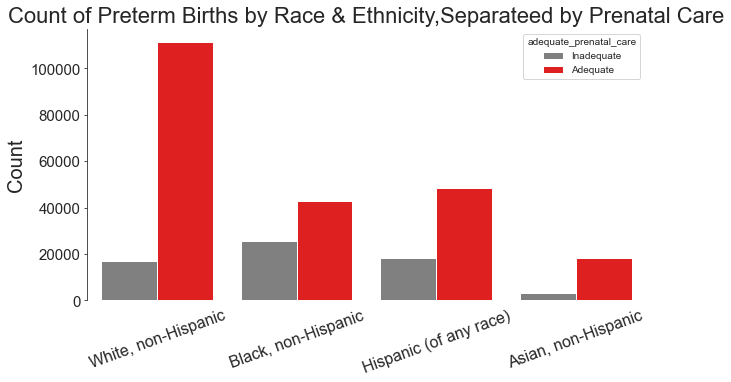

In [49]:
df2 = df[df['preterm_indicator']==1]
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey','red']
ax=sns.countplot(x='reported_race_ethnicity',data=df2,hue='adequate_prenatal_care',palette = colors)
plt.title('Count of Preterm Births by Race & Ethnicity,Separateed by Prenatal Care', fontsize=22)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=20)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()


* Black Women tend to have a higher risk towards preterm birth due to inadquate prenatal Care.
* Among all the Races, White Women recieved the maximum no.of adequate prenatal care.
* Lowest inadquate prenatal care is of Asian Women.

### Analyzing the Impact of Previous births on Preterm Birth

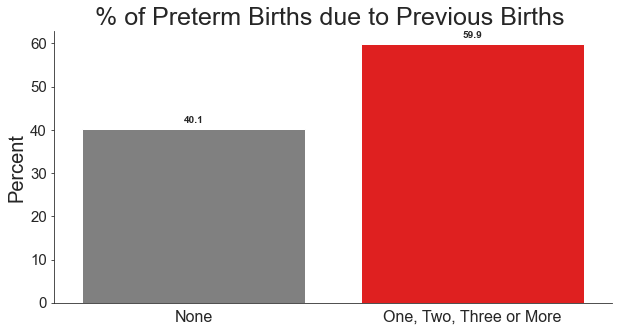

In [50]:
percent = ((df1.previous_births.value_counts() / len(df1)) * 100).to_frame()
percent.index = percent.index.str.strip()

percent = percent.sort_index()
percent.reset_index(inplace=True)
percent.columns = ['previous_births','percentage']
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
# colors = ['grey', 'grey', 'grey', 'grey', 'red', 'grey', 'grey', 'grey', 'grey', 'grey']
graph=sns.barplot(x=percent['previous_births'],y=percent['percentage'],palette = ['grey','red'])
plt.title('% of Preterm Births due to Previous Births ', fontsize=25)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=0)
plt.ylabel('Percent', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=False)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                  textcoords = 'offset points',
                   weight='bold')
plt.show()

* Women who have had one or more previous births are at a higher risk of preterm birth. This can happen due to the effects of the pregnancy on the uterus and cervix, but it can also happen because the placenta may be weakened or underdeveloped in subsequent pregnancies.
 


### Impact of Tobacco consumption during pregnancy on Preterm Births

Studies show that smoking while pregnant can cause birth defects and preterm births. Cigarettes contain nicotine, which is a stimulant that relaxes the uterus. Smoking can also cause constriction of the blood vessels, which leads to less oxygen getting to the baby in the uterus. The lack of oxygen can affect the development of organs, including the brain and heart. Babies born prematurely have an increased risk for chronic lung disease, cognitive impairment, sudden infant death syndrome (SIDS), and other problems.

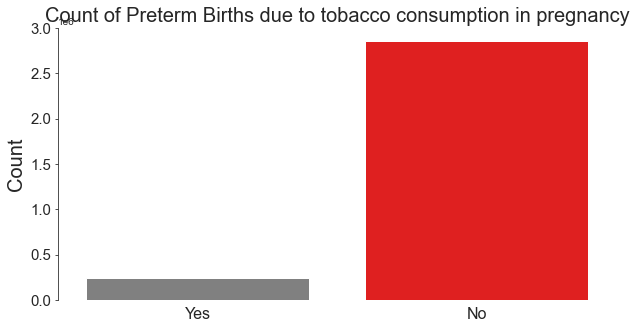

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey','red']
ax=sns.countplot(x='tobacco_use_during_pregnancy',data=df,palette = colors)
plt.title('Count of Preterm Births due to tobacco consumption in pregnancy', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=0)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()

* As I have said earlier the dataset is highly imbalanced towards the No preterm births in Women Therefore we couldn't see real impact of Tobacco on Preterm Birth.
* But there are cases of consumption of tobacco during pregnancy leads to preterm births.

### Impact of Adequate prenatal Care on Preterm Births.

* Women that receive adequate prenatal care are less likely to have preterm births. This includes eating a healthy diet, getting enough rest, and taking prenatal vitamins. It also includes visiting the doctor for regular checkups, especially if they have a health condition. If a woman has an infection during pregnancy, it is important to take antibiotics right away.
* Women that do not get adequate prenatal care are more likely to have preterm births. Factors like smoking cigarettes, drinking alcohol, using drugs or other substances, being underweight or overweight, having diabetes or cardiovascular disease, carrying twins or triplets can increase the risk of preterm birth.

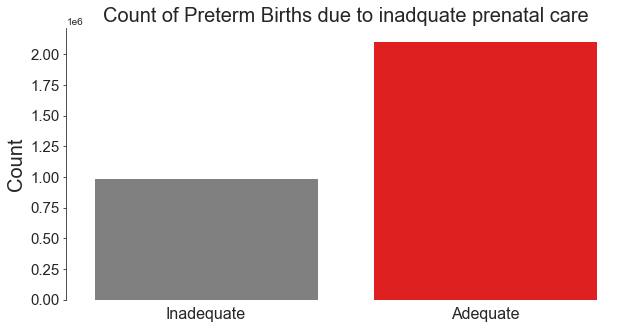

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
colors = ['grey','red']
ax=sns.countplot(x='adequate_prenatal_care',data=df,palette = colors)
plt.title('Count of Preterm Births due to inadquate prenatal care', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=16,rotation=0)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize=15)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)

plt.show()

* Here it is also the similar case with inadequate prenatal care feature because of Uneven distribution of Preterm births.
* In real it has huge impact over preterm births as we have mentioned it above.